<a href="https://colab.research.google.com/github/snmouhcine/Google_Stock_Price_Prediction_LSTM/blob/master/Google_Stock_Price_Predictions_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import io 
from google.colab import files
uploaded = files.upload()

Saving GOOG_Train_1.csv to GOOG_Train_1 (4).csv


In [2]:
dataset_train = pd.read_csv(io.BytesIO(uploaded['GOOG_Train_1.csv']))
training_set = dataset_train.iloc[:, 1:2].values
training_set


array([[ 345.141327],
       [ 341.350525],
       [ 338.575928],
       ...,
       [1309.859985],
       [1315.      ],
       [1307.119995]])

In [0]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
X_train = []
y_train = []
for i in range(120, 3000):
  X_train.append(training_set_scaled[i-120:i, 0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

[TensorFlow 2 in Colab](https://colab.research.google.com/notebooks/tensorflow_version.ipynb#scrollTo=NeWVBhf1VxlH)



In [6]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf
print(tf.__version__)

Using TensorFlow backend.


2.1.0-rc1


In [0]:
regressor = tf.keras.Sequential()

In [0]:

regressor.add(tf.keras.layers.LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(tf.keras.layers.Dropout(0.2))


regressor.add(tf.keras.layers.LSTM(units = 100, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))


regressor.add(tf.keras.layers.LSTM(units = 100, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

regressor.add(tf.keras.layers.LSTM(units = 100, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

regressor.add(tf.keras.layers.LSTM(units = 100))
regressor.add(tf.keras.layers.Dropout(0.2))


regressor.add(tf.keras.layers.Dense(units = 1))

In [0]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [11]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Train on 2880 samples
Epoch 1/100
2880/2880 [==============================] - 9s 3ms/sample - loss: 0.0158
Epoch 2/100
2880/2880 [==============================] - 3s 868us/sample - loss: 0.0020
Epoch 3/100
2880/2880 [==============================] - 2s 854us/sample - loss: 0.0021
Epoch 4/100
2880/2880 [==============================] - 2s 858us/sample - loss: 0.0016
Epoch 5/100
2880/2880 [==============================] - 2s 860us/sample - loss: 0.0022
Epoch 6/100
2880/2880 [==============================] - 2s 849us/sample - loss: 0.0016
Epoch 7/100
2880/2880 [==============================] - 2s 851us/sample - loss: 0.0015
Epoch 8/100
2880/2880 [==============================] - 2s 864us/sample - loss: 0.0017
Epoch 9/100
2880/2880 [==============================] - 2s 857us/sample - loss: 0.0014
Epoch 10/100
2880/2880 [==============================] - 2s 857us/sample - loss: 0.0017
Epoch 11/100
2880/2880 [==============================] - 3s 874us/sample - loss: 0.0016
Epoch 12/1

In [12]:
from google.colab import files
uploaded_test = files.upload()

Saving GOOG_Test.csv to GOOG_Test (5).csv


In [0]:
dataset_test = pd.read_csv(io.BytesIO(uploaded_test['GOOG_Test.csv']))
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(120, 140):
    X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


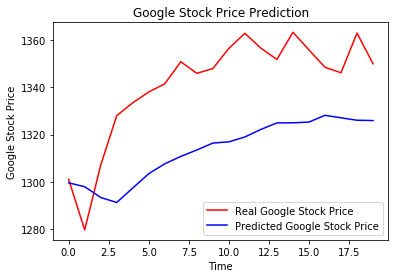

In [16]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()